In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv(r'C:\Users\Marco\Documents\jupyter_notebook\economy_final.csv', sep = ';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              170 non-null    object 
 1   gdp_capita           170 non-null    int64  
 2   interest_rate        159 non-null    float64
 3   unemployment         165 non-null    float64
 4   inflation            163 non-null    float64
 5   export_ratio         168 non-null    object 
 6   import_ratio         168 non-null    object 
 7   foreign_trade_ratio  168 non-null    object 
 8   debt_ratio           165 non-null    float64
 9   surplus_to_gdp       169 non-null    object 
 10  gini                 149 non-null    float64
 11  corp_tax             142 non-null    float64
 12  economic_freedom     162 non-null    float64
dtypes: float64(7), int64(1), object(5)
memory usage: 17.4+ KB


In [4]:
df.isnull().sum()

country                 0
gdp_capita              0
interest_rate          11
unemployment            5
inflation               7
export_ratio            2
import_ratio            2
foreign_trade_ratio     2
debt_ratio              5
surplus_to_gdp          1
gini                   21
corp_tax               28
economic_freedom        8
dtype: int64

In [5]:
df.export_ratio = df.export_ratio.str.rstrip(' %')
df.import_ratio = df.import_ratio.str.rstrip(' %')
df.foreign_trade_ratio = df.foreign_trade_ratio.str.rstrip(' %')
df.surplus_to_gdp = df.surplus_to_gdp.str.lstrip('−')
df.surplus_to_gdp = df.surplus_to_gdp.str.rstrip(' %')

In [6]:
df['export_ratio'] = df['export_ratio'].astype('float')
df['import_ratio'] = df['import_ratio'].astype('float')
df['foreign_trade_ratio'] = df['foreign_trade_ratio'].astype('float')

In [7]:
df.surplus_to_gdp = df.surplus_to_gdp.str.strip('\n')
df.surplus_to_gdp = df.surplus_to_gdp.str.lstrip('-')
df.surplus_to_gdp = df.surplus_to_gdp.str.replace('\xa0', '')

In [8]:
df.surplus_to_gdp = df.surplus_to_gdp.replace('', np.NAN)

In [9]:
df.surplus_to_gdp = df.surplus_to_gdp.astype('float')

## Feature Tuning

In [10]:
europe = ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina',
'Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Georgia','Germany',
'Greece','Hungary','Iceland','Ireland','Italy','Kazakhstan','Kosovo','Latvia','Liechtenstein','Lithuania',
'Luxembourg','Malta','Moldova','Monaco','Montenegro','Netherlands','North Macedonia','Norway','Poland','Portugal',
'Romania','Russia','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Turkey','Ukraine','United Kingdom', 'Czech Republic'
]

df['continent'] = ''

df.loc[df.country.isin(europe), 'continent'] = 'europe'

asia = ['Afghanistan','Armenia','Azerbaijan','Bahrain','Bangladesh','Bhutan','Brunei','Cambodia',
'China','Cyprus','Georgia','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan',
'Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea',
'Oman','Pakistan','Palestine','Philippines','Qatar','Russia','Saudi Arabia','Singapore','South Korea',
'Sri Lanka','Syria','Taiwan','Tajikistan','Thailand','Timor-Leste','Turkey','Turkmenistan','United Arab Emirates',
'Uzbekistan','Vietnam','Yemen', 'Hong Kong']

df.loc[df.country.isin(asia), 'continent'] = 'asia'

africa = ['Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cabo Verde','Cameroon',
'Central African Republic','Chad','Comoros','Democratic Republic of the Congo','Republic of the Congo','Ivory Coast',
'Djibouti','Egypt','Equatorial Guinea','Eritrea','Swaziland','Ethiopia','Gabon','Gambia','Ghana',
'Guinea','Guinea-Bissau','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco',
'Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles',
'Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Tanzania','Togo','Tunisia','Uganda',
'Zambia','Zimbabwe']

df.loc[df.country.isin(africa), 'continent'] = 'africa'

north_america = ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba',
'Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica',
'Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines',
'Trinidad and Tobago','United States']

df.loc[df.country.isin(north_america), 'continent'] = 'north america'

south_america = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay',
                 'Peru','Suriname','Uruguay','Venezuela']

df.loc[df.country.isin(south_america), 'continent'] = 'south america'

oceania = ['Australia','Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand',
'Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu']

df.loc[df.country.isin(oceania), 'continent'] = 'oceania'

In [11]:
# df.set_index('country', inplace = True)

In [12]:
df['net_exports'] = df['export_ratio'] - df['import_ratio']

## EDA

[Text(0.5, 1.0, 'Log Distribution')]

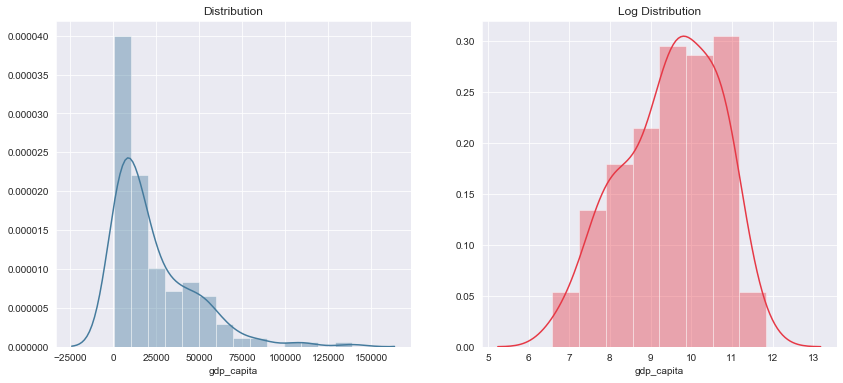

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1 = sns.distplot(df.gdp_capita, ax=ax1, color = '#457b9d')
ax1.set(title = 'Distribution')
ax2 = sns.distplot(np.log(df.gdp_capita), ax = ax2, color = '#e63946')
ax2.set(title = 'Log Distribution') 

[Text(0.5, 1.0, 'Interest Rate vs. Inflation')]

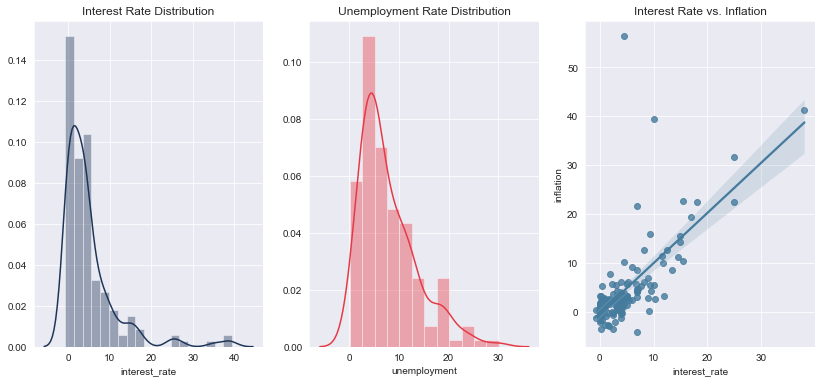

In [14]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,6))

ax1 = sns.distplot(df.interest_rate, ax = ax1, color = '#1d3557')
ax1.set(title = 'Interest Rate Distribution')

ax2 = sns.distplot(df.unemployment, ax = ax2, color = '#e63946')
ax2.set(title = 'Unemployment Rate Distribution')

ax3 = sns.regplot(x = 'interest_rate', y = 'inflation', data = df[df.inflation < 60], color = '#457b9d')
ax3.set(title = 'Interest Rate vs. Inflation')

[Text(0.5, 1.0, 'Debt Ratio Log Distribution')]

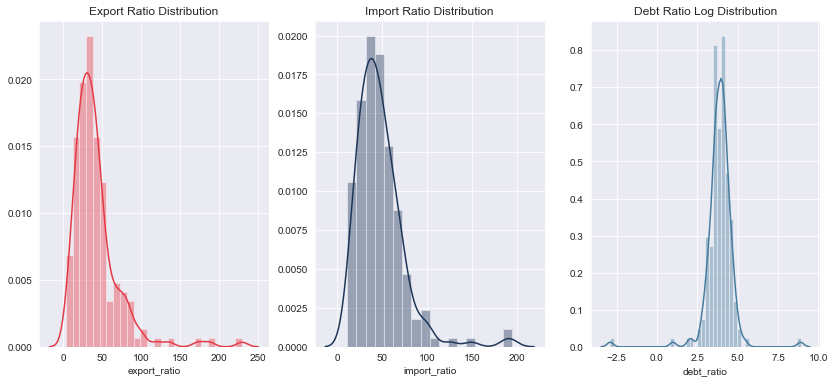

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,6))

ax1 = sns.distplot(df.export_ratio, ax = ax1, color = '#e63946')
ax1.set(title = 'Export Ratio Distribution')
ax2 = sns.distplot(df.import_ratio, ax = ax2, color = '#1d3557')
ax2.set(title = 'Import Ratio Distribution')
ax3 = sns.distplot(np.log(df.debt_ratio), ax = ax3, color = '#457b9d')
ax3.set(title = 'Debt Ratio Log Distribution')

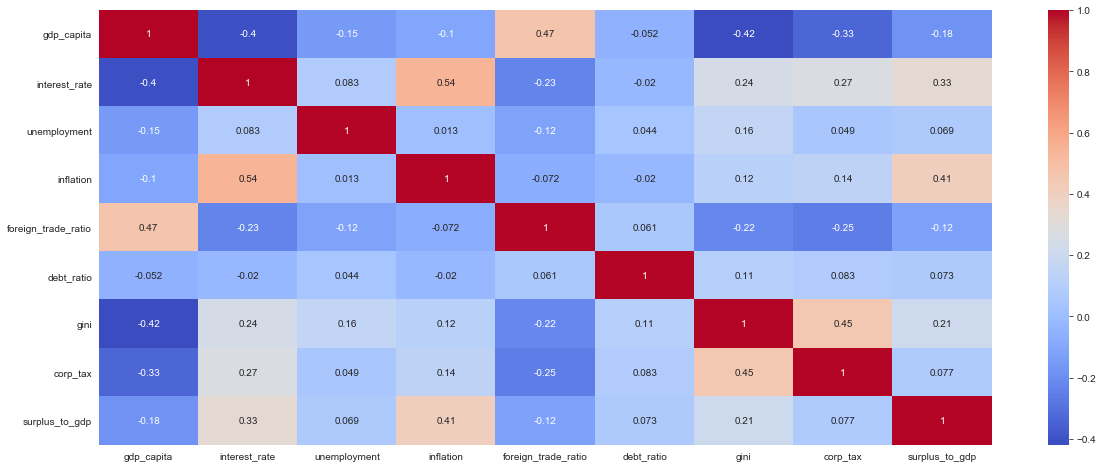

In [16]:
df_corr = df[['gdp_capita', 'interest_rate', 'unemployment', 'inflation', 'foreign_trade_ratio', 'debt_ratio', 'gini', 'corp_tax', 'surplus_to_gdp']]

plt.figure(figsize = (20,8))
sns.heatmap(df_corr.corr(), annot = True, cmap = 'coolwarm')

[Text(0.5, 1.0, 'Foreign Trade Ratio vs. GDP per capita')]

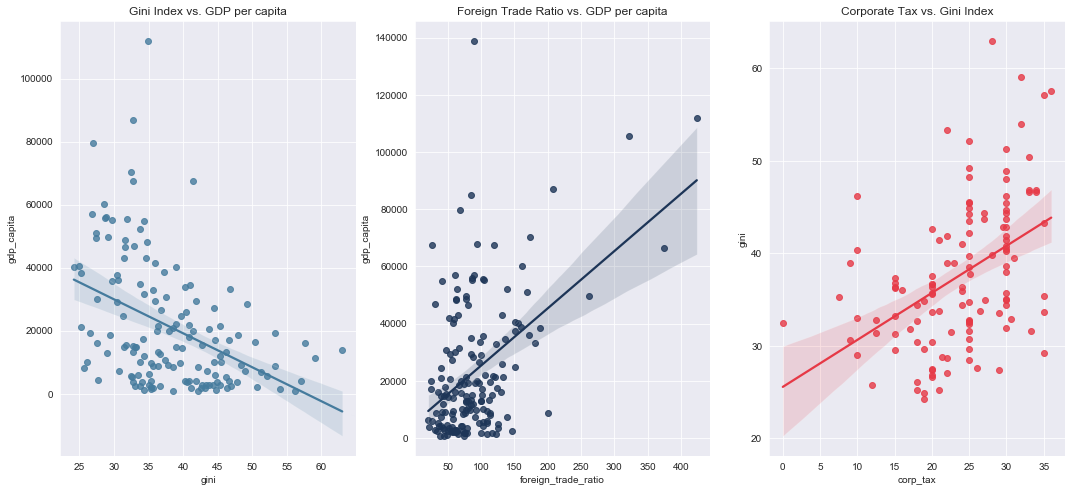

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,8))

ax1 = sns.regplot(x = 'gini', y = 'gdp_capita', data=df, ax = ax1, color = '#457b9d')
ax1.set(title = 'Gini Index vs. GDP per capita')

ax3 = sns.regplot(x = 'corp_tax', y = 'gini', data = df, ax = ax3, color = '#e63946')
ax3.set(title = 'Corporate Tax vs. Gini Index')

ax2 = sns.regplot(x = 'foreign_trade_ratio', y = 'gdp_capita', data=df, ax = ax2, color = '#1d3557')
ax2.set(title = 'Foreign Trade Ratio vs. GDP per capita')

[Text(0.5, 0, ''), Text(0.5, 1.0, 'Foreign Rrade Ratio by Continent')]

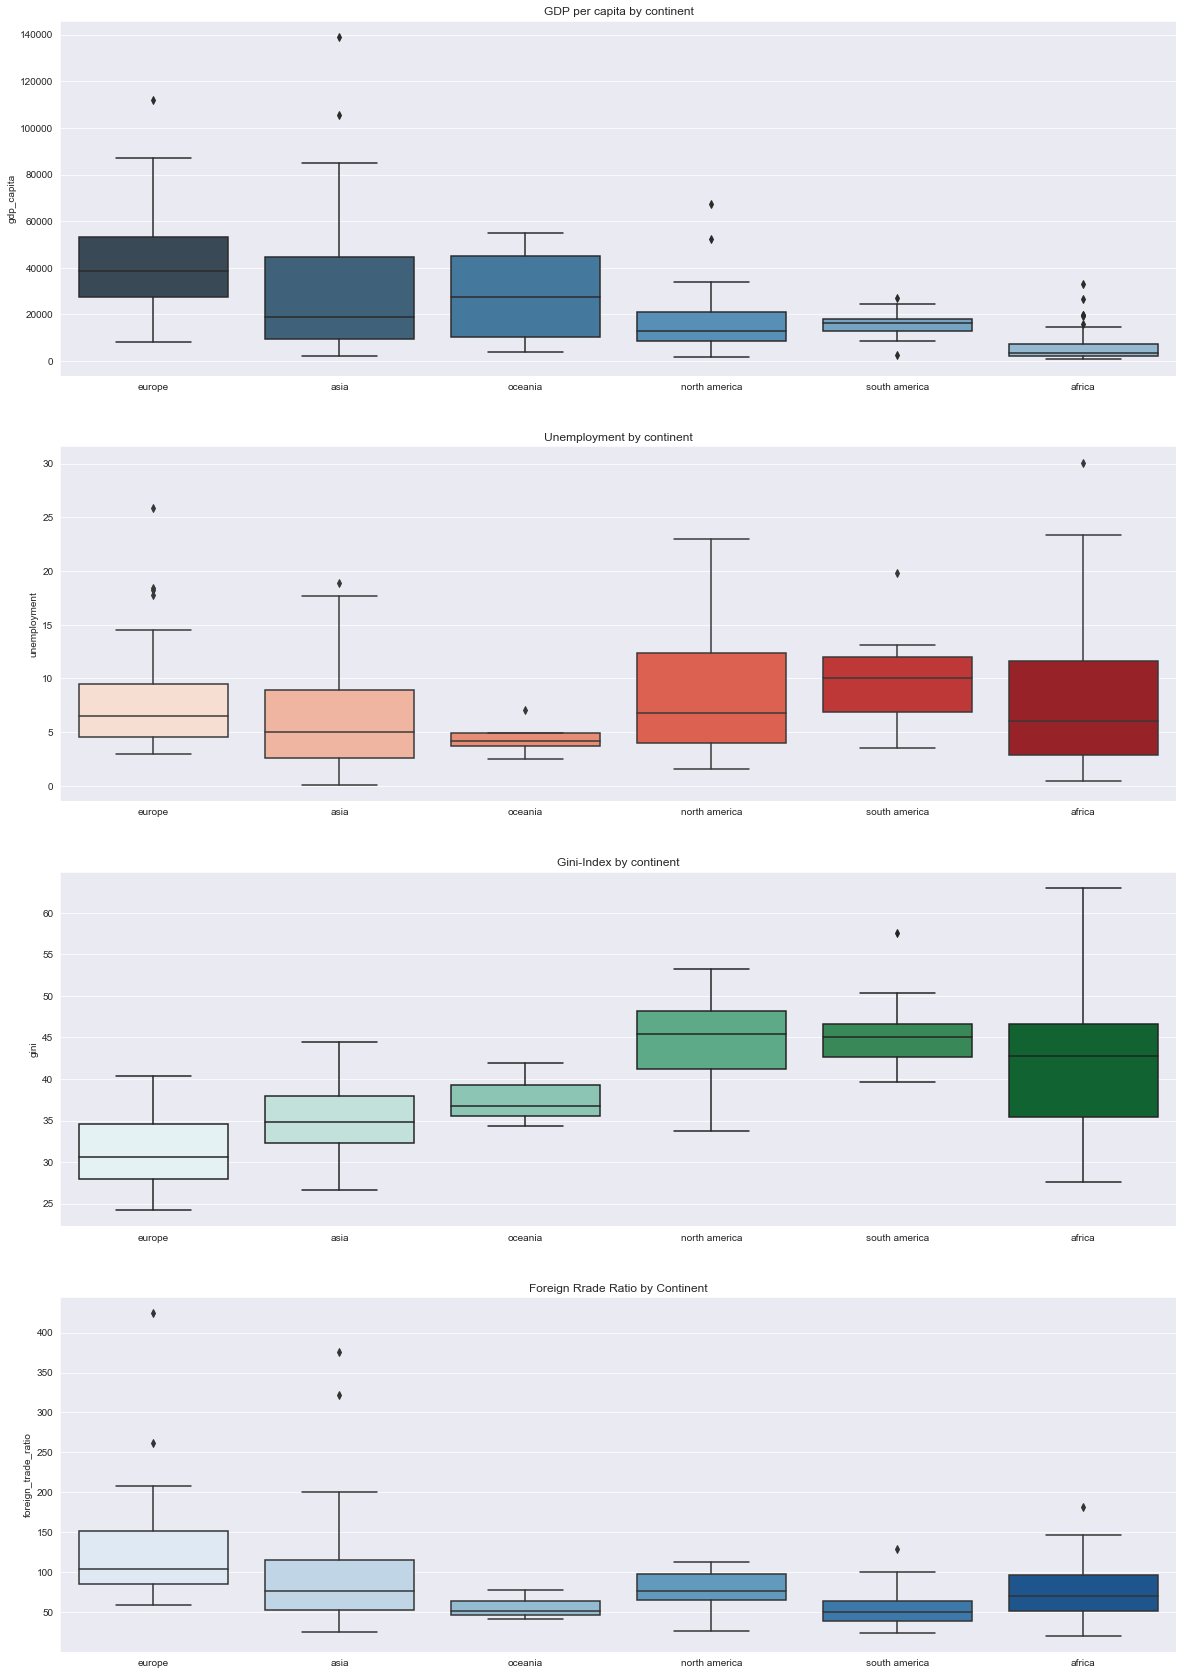

In [18]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (20,30))

ax1 = sns.boxplot(x = 'continent', y = 'gdp_capita', data = df, ax = ax1, palette = 'Blues_d',
                 order = ['europe', 'asia', 'oceania', 'north america', 'south america', 'africa'])
ax1.set(xlabel = '', title = 'GDP per capita by continent')

ax2 = sns.boxplot(x = 'continent', y = 'unemployment', data = df, ax = ax2, palette = 'Reds',
                 order = ['europe', 'asia', 'oceania', 'north america', 'south america', 'africa'])
ax2.set(xlabel = '', title = 'Unemployment by continent')

ax3 = sns.boxplot(x = 'continent', y = 'gini', data = df, ax = ax3, palette = 'BuGn',
                 order = ['europe', 'asia', 'oceania', 'north america', 'south america', 'africa'])
ax3.set(xlabel = '', title = 'Gini-Index by continent')

ax4 = sns.boxplot(x = 'continent', y = 'foreign_trade_ratio', data = df, ax = ax4, palette ='Blues',
                 order = ['europe', 'asia', 'oceania', 'north america', 'south america', 'africa'])
ax4.set(xlabel = '', title = 'Foreign Rrade Ratio by Continent')

In [19]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.io as pio

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
import plotly.express as px

pd.options.display.max_columns = None


data = dict(type = 'choropleth',
            locations = df['country'],
            locationmode = 'country names',
            z = df['gdp_capita'],
            colorscale = 'YlOrRd',
            colorbar = {'title': 'GDP per Capita'})
            

layout = dict(title = 'GDP per Capita',
              geo = dict(showframe = True,
                         projection = {'type':'natural earth'}),
             mapbox_style="carto-positron")

choromap = go.Figure(data = [data],layout=layout)
iplot(choromap)

In [20]:
data = dict(type = 'choropleth',
            locations = df['country'],
            locationmode = 'country names',
            z = df['gini'],
            colorscale = 'YlOrRd',
            colorbar = {'title': 'Gini Index'})
            

layout = dict(title = 'Gini Index by Country',
              geo = dict(showframe = True,
                         projection = {'type':'natural earth'}),
             mapbox_style="carto-positron")

choromap = go.Figure(data = [data],layout=layout)
iplot(choromap)

In [21]:
data = dict(type = 'choropleth',
            locations = df['country'],
            locationmode = 'country names',
            z = df['economic_freedom'],
            colorscale = 'YlOrRd',
            colorbar = {'title': 'Economic Freedom'})
            

layout = dict(title = 'Economic Freedom by Country',
              geo = dict(showframe = True,
                         projection = {'type':'natural earth'}),
             mapbox_style="carto-positron")

choromap = go.Figure(data = [data],layout=layout)
iplot(choromap)

[Text(0.5, 0, 'Debt Ratio'), Text(0.5, 1.0, 'Debt Ratio by Continent')]

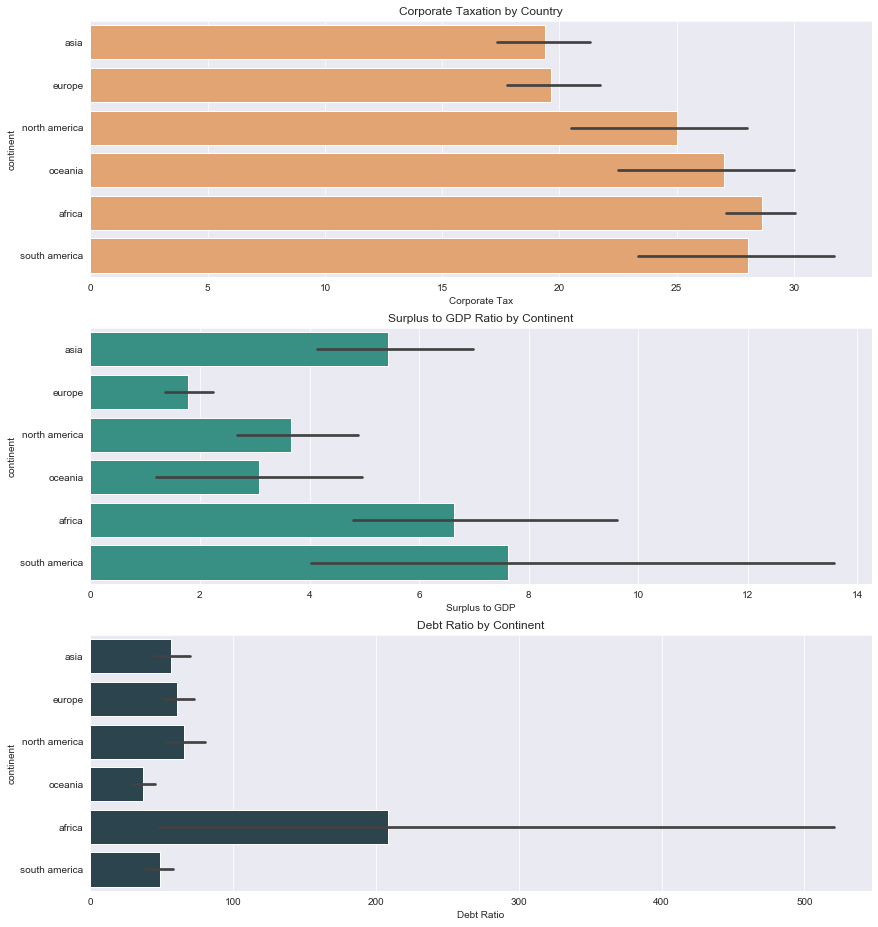

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (14,16))

ax1 = sns.barplot(x = 'corp_tax', y = 'continent', data = df, color = '#f4a261', ax = ax1)
ax1.set(title = 'Corporate Taxation by Country', xlabel = 'Corporate Tax')
ax2 = sns.barplot(x = 'surplus_to_gdp', y = 'continent', data = df, color = '#2a9d8f', ax = ax2)
ax2.set(title = 'Surplus to GDP Ratio by Continent', xlabel = 'Surplus to GDP')
ax3 = sns.barplot(x = 'debt_ratio', y = 'continent', data = df, color = '#264653', ax = ax3)
ax3.set(title = 'Debt Ratio by Continent', xlabel = 'Debt Ratio')

In [23]:
df.loc[df['net_exports'] > 0, 'export_cat'] = 'positive'
df.loc[df['net_exports'] < 0, 'export_cat'] = 'negative'

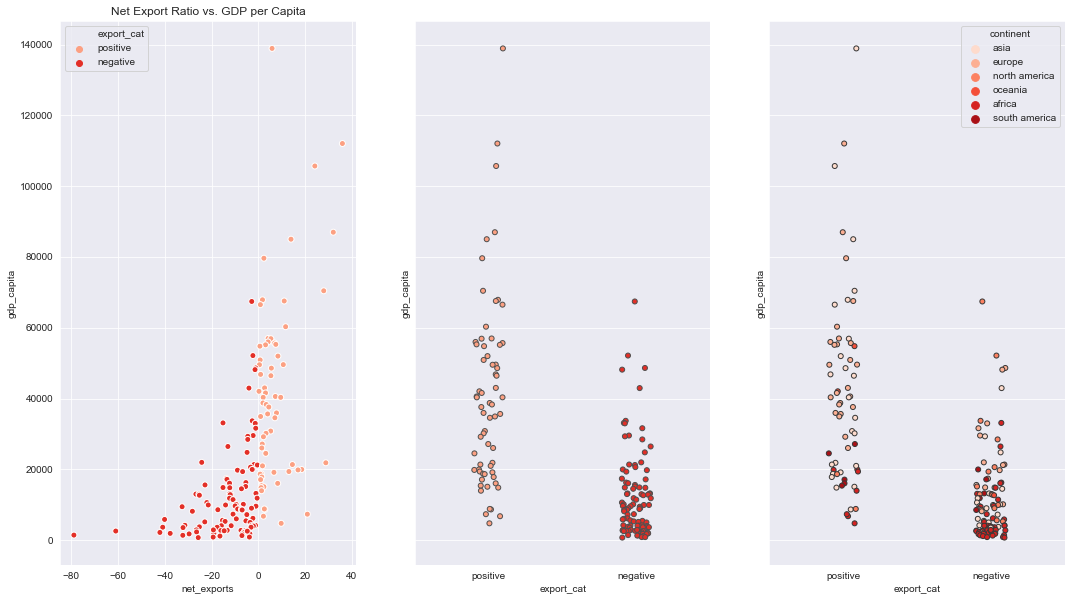

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (18,10), sharey = True)

ax1 = sns.scatterplot(x = 'net_exports', y ='gdp_capita', hue = 'export_cat', linewidth=1, data = df, palette = 'Reds', ax = ax1)
ax1.set(title = 'Net Export Ratio vs. GDP per Capita')

ax2 = sns.stripplot(x = 'export_cat', y = 'gdp_capita', linewidth=1, data = df, ax = ax2, palette = 'Reds')

ax3 = sns.stripplot(x = 'export_cat', y = 'gdp_capita', hue = 'continent', linewidth=1, data = df, ax = ax3, palette = 'Reds')


## Missing Values

In [25]:
df.isnull().sum()

country                 0
gdp_capita              0
interest_rate          11
unemployment            5
inflation               7
export_ratio            2
import_ratio            2
foreign_trade_ratio     2
debt_ratio              5
surplus_to_gdp          2
gini                   21
corp_tax               28
economic_freedom        8
continent               0
net_exports             2
export_cat              2
dtype: int64

In [26]:
df.dropna(thresh = 12, inplace = True)
df.set_index('country', inplace = True)
df.drop(columns = ['export_ratio', 'import_ratio', 'export_cat'], inplace = True)

In [27]:
asia_df = df[df.continent == 'asia']
europe_df = df[df.continent == 'europe']
oceania_df = df[df.continent == 'oceania']
africa_df = df[df.continent == 'africa']
south_america_df = df[df.continent == 'south america']
north_america_df = df[df.continent == 'north america']

In [28]:
asia_df.drop('continent', axis=1, inplace = True)
europe_df.drop('continent', axis=1, inplace = True)
oceania_df.drop('continent', axis=1, inplace = True)
africa_df.drop('continent', axis=1, inplace = True)
south_america_df.drop('continent', axis=1, inplace = True)
north_america_df.drop('continent', axis = 1, inplace = True)

C:\Users\Marco\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
asia = imputer.fit_transform(asia_df)
europe = imputer.fit_transform(europe_df)
oceania = imputer.fit_transform(oceania_df)
africa = imputer.fit_transform(africa_df)
south_america = imputer.fit_transform(south_america_df)
north_america = imputer.fit_transform(north_america_df)

In [30]:
df_asia = pd.DataFrame(asia, index = asia_df.index, columns = asia_df.columns)
df_europe = pd.DataFrame(europe, index = europe_df.index, columns = europe_df.columns)
df_oceania = pd.DataFrame(oceania, index = oceania_df.index, columns = oceania_df.columns)
df_africa = pd.DataFrame(africa, index = africa_df.index, columns = africa_df.columns)
df_south_america = pd.DataFrame(south_america, index = south_america_df.index, columns = south_america_df.columns)
df_north_america = pd.DataFrame(north_america, index = north_america_df.index, columns = north_america_df.columns)

In [31]:
df1 = [df_asia, df_europe, df_oceania, df_africa, df_south_america, df_north_america]

In [32]:
df1 = pd.concat([df_asia, df_europe, df_oceania, df_africa, df_south_america, df_north_america], sort = False)

## Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

attribs = list(df1)
df1_tr = pipeline.fit_transform(df1)

In [41]:
df2 = pd.DataFrame(df1_tr, index = df1.index, columns = df1.columns)

## PCA

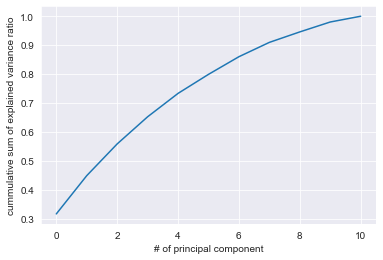

In [44]:
from sklearn.decomposition import PCA

pca = PCA().fit(df2)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of principal component')
plt.ylabel('cummulative sum of explained variance ratio')
plt.show()

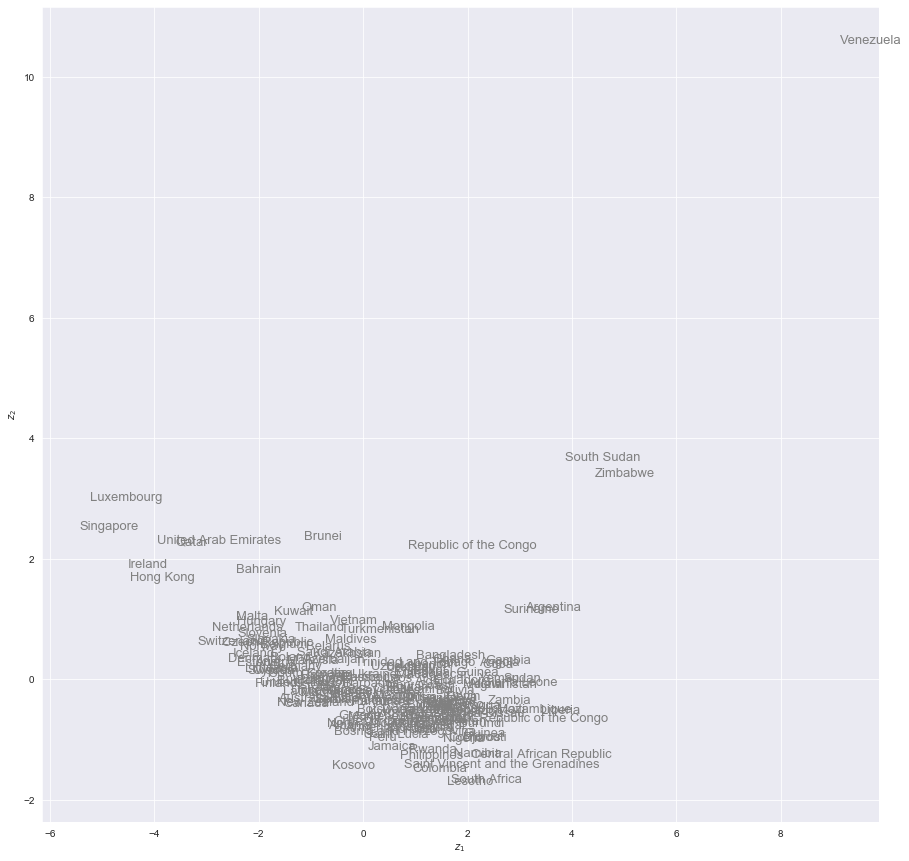

In [48]:
Z = pca.transform(df2)

plt.figure(figsize = (15,15))
plt.scatter(Z[:,0], Z[:,1], alpha = 0)
plt.xlabel(r'$z_1$')
plt.ylabel(r'$z_2$')

for i in range(0, 167):
    plt.annotate(df2.index[i], (Z[i,0], Z[i, 1]), color = 'gray', fontsize = 13)
    
plt.show()

## Clustering

##### KMeans

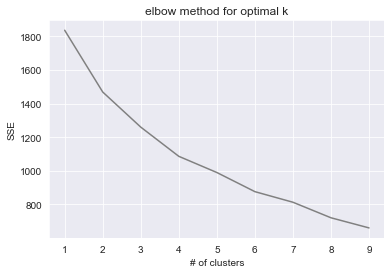

In [51]:
from sklearn.cluster import KMeans

Nc = range(1,10)
kmeans_Nc = [KMeans(n_clusters = i) for i in Nc]
score_Nc = [kmeans_Nc[i].fit(df2).inertia_ for i in range(len(kmeans_Nc))]

plt.plot(Nc, score_Nc, color = 'gray')
plt.title('elbow method for optimal k')
plt.xlabel('# of clusters')
plt.ylabel('SSE')
plt.show()

In [130]:
kmeans = KMeans(n_clusters = 3, random_state = 44)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=44, tol=0.0001, verbose=0)

In [131]:
df2['kmeans'] = kmeans.labels_

In [132]:
df2.kmeans.value_counts()

2    74
1    59
0    34
Name: kmeans, dtype: int64

In [133]:
data = dict(type = 'choropleth',
           locations = df2.index,
           locationmode = 'country names',
           z = df2.kmeans,
           colorscale = 'YlOrRd',
           colorbar = {'title': 'KMeans'})

layout = dict(title = 'Kmeans Clustering',
             geo = dict(showframe = True,
                       projection = {'type': 'natural earth'}),
             mapbox_style = 'carto_positron')

choromap = go.Figure(data = data, layout = layout)
iplot(choromap)

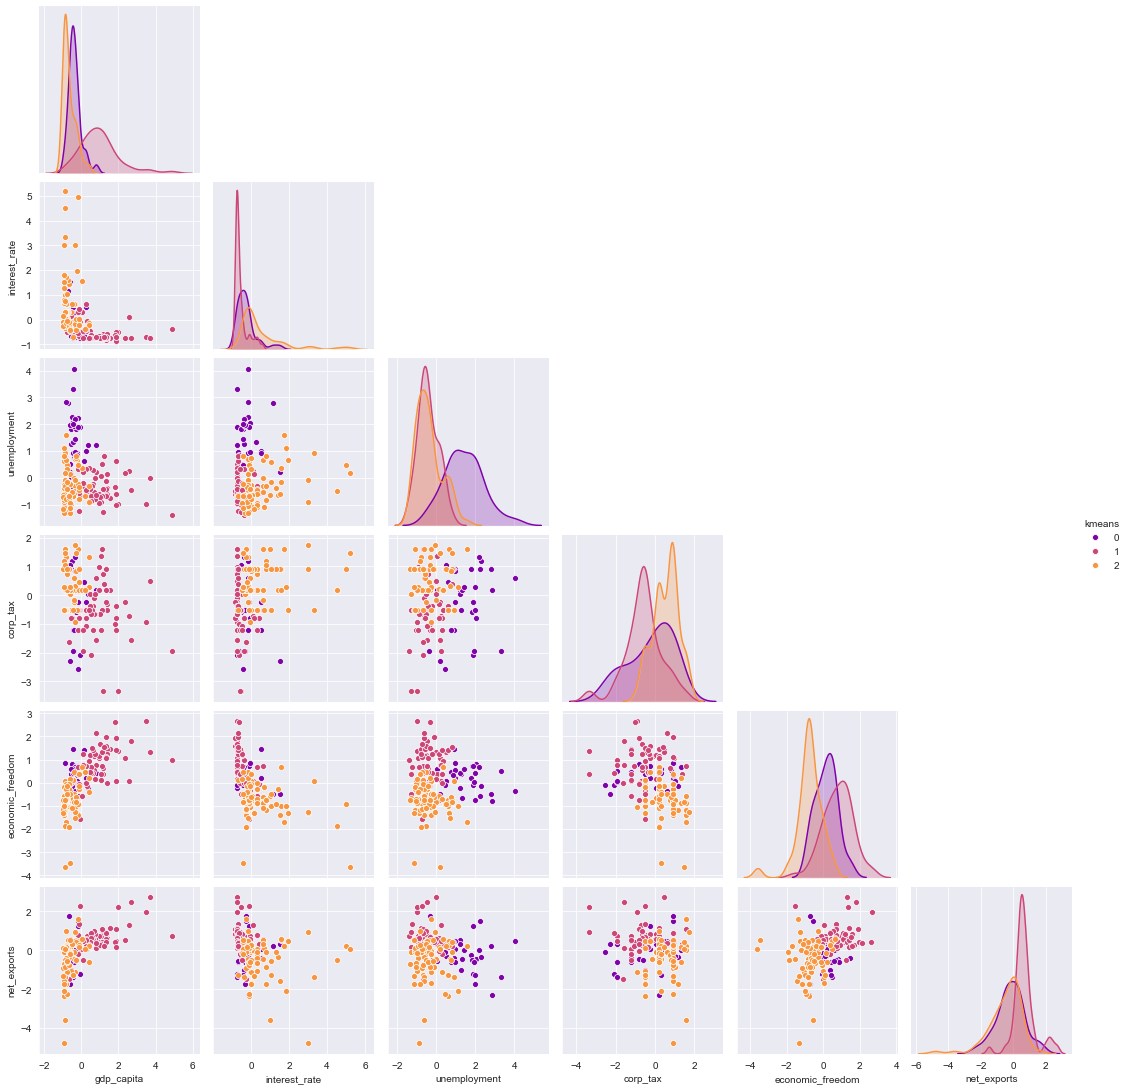

In [134]:
df2_exp = df2[['gdp_capita', 'interest_rate', 'unemployment', 'corp_tax', 'economic_freedom',
                         'net_exports', 'kmeans']]

sns.pairplot(df2_exp, hue = 'kmeans', palette = 'plasma', corner = True)

##### Agglomerative Clustering

In [135]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
link = 'average'

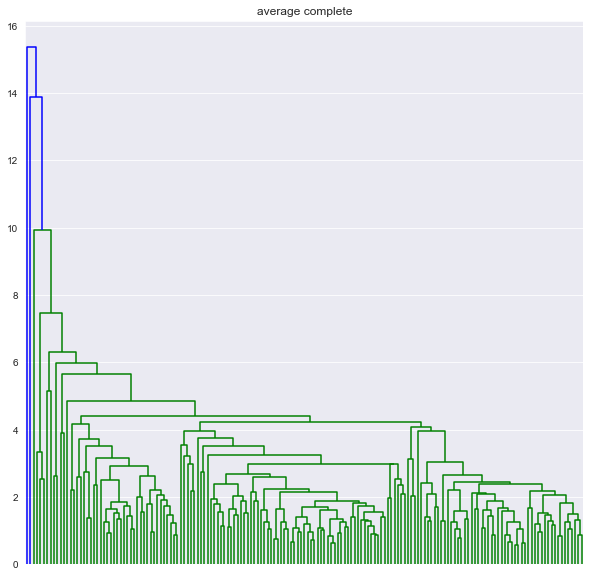

In [136]:
fig = plt.figure(figsize=(10,10))
D = shc.dendrogram(shc.linkage(df2, method=link), orientation = 'top', no_labels = True)
plt.title(link + ' complete')
plt.show()

In [137]:
Nc = 3
agglo = AgglomerativeClustering(n_clusters = Nc, linkage  = link)
agglo.fit(df2)
df2['agglo'] = agglo.labels_

In [138]:
df2.agglo.value_counts()

0    165
2      1
1      1
Name: agglo, dtype: int64

##### Gaussian Mixture Model

In [139]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3).fit(df2)
labels = gmm.predict(df2)

In [140]:
df2['gaussian'] = labels

In [141]:
df2.gaussian.value_counts()

2    74
0    59
1    34
Name: gaussian, dtype: int64

In [142]:
data = dict(type = 'choropleth',
           locations = df2.index,
           locationmode = 'country names',
           z = df2.gaussian,
           colorscale = 'YlOrRd',
           colorbar = {'title': 'Gaussian Mixture Model'})

layout = dict(title = 'Gaussian Mixture Model',
             geo = dict(showframe = True,
                       projection = {'type': 'natural earth'}),
             mapbox_style = 'carto_positron')

choromap = go.Figure(data = data, layout = layout)
iplot(choromap)

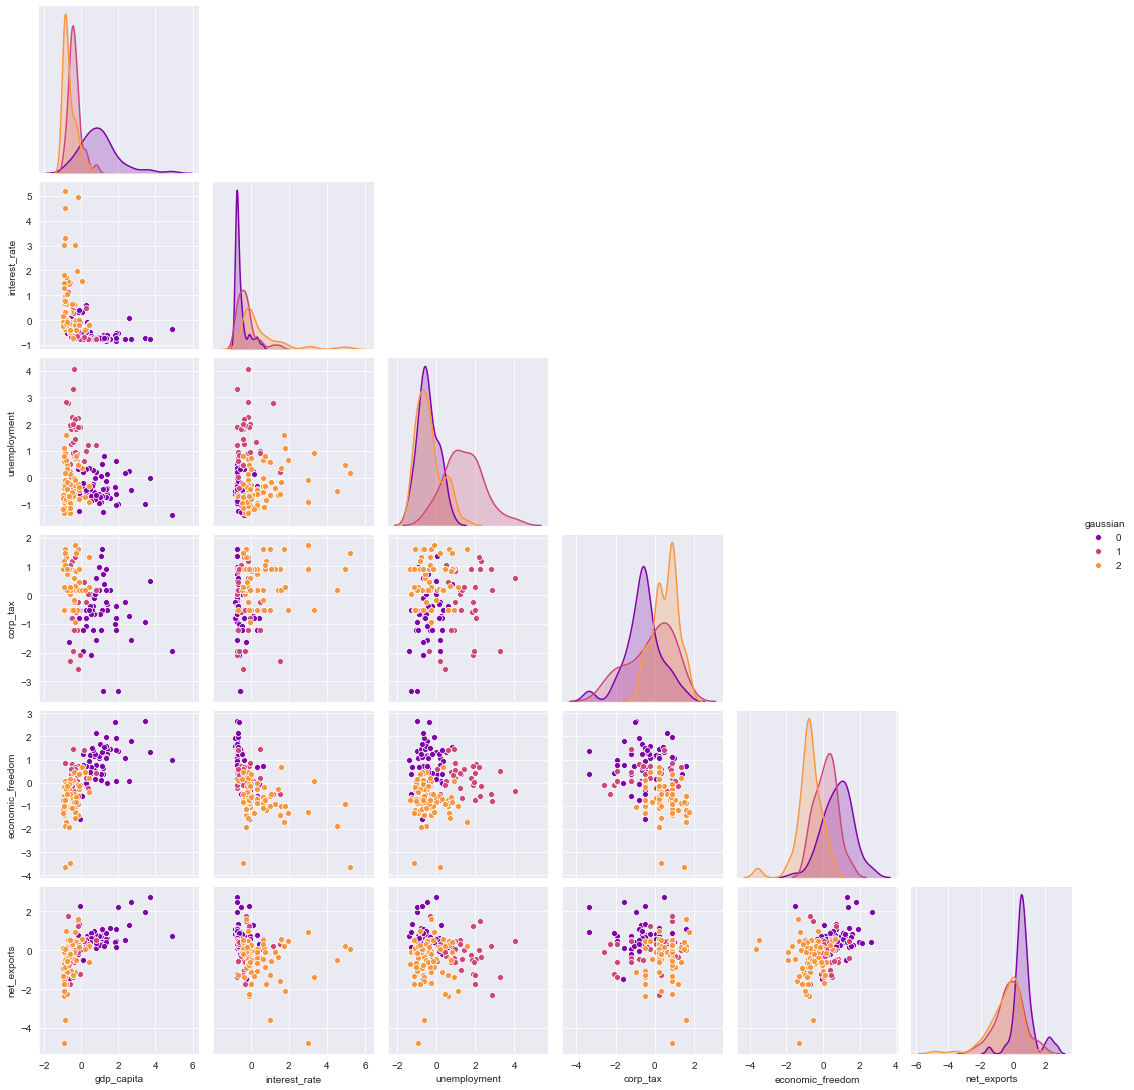

In [143]:
df2_exp = df2[['gdp_capita', 'interest_rate', 'unemployment', 'corp_tax', 'economic_freedom',
                         'net_exports', 'gaussian']]

sns.pairplot(df2_exp, hue = 'gaussian', palette = 'plasma', corner = True)

C:\Users\Marco\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Marco\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'GDP per Capita')

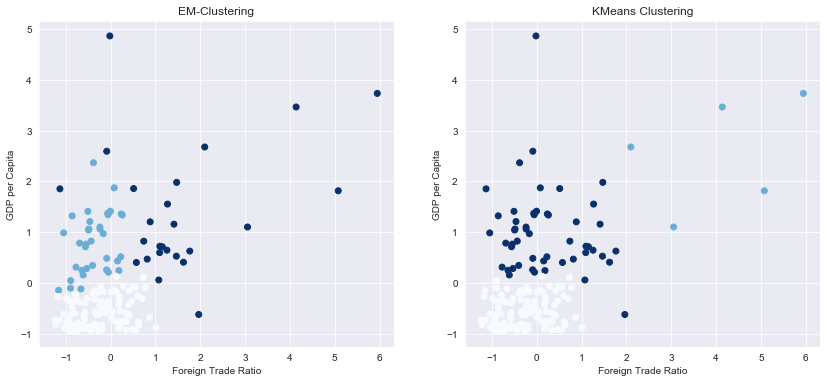

In [202]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,6))

X = df2[['gdp_capita', 'foreign_trade_ratio']]

EM = GaussianMixture(n_components = 3, random_state = 11)
EM.fit(X)
cluster = EM.predict(X)

X['cluster'] = cluster

kmeans = KMeans(n_clusters = 3, random_state = 11)
kmeans.fit(X)
cluster2 = kmeans.predict(X)

X['cluster2'] = cluster2

ax1.scatter(x = X['foreign_trade_ratio'], y = X['gdp_capita'], c = X['cluster'], cmap = 'Blues')
ax1.set_title('EM-Clustering')
ax1.set_xlabel('Foreign Trade Ratio')
ax1.set_ylabel('GDP per Capita')
ax2.scatter(x = X['foreign_trade_ratio'], y = X['gdp_capita'], c = X['cluster2'], cmap = 'Blues')
ax2.set_title('KMeans Clustering')
ax2.set_xlabel('Foreign Trade Ratio')
ax2.set_ylabel('GDP per Capita')